[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PySDM-examples/blob/main/PySDM_examples/deJong_Mackay_2022/straub_fig10.ipynb)    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM-examples.git/main?urlpath=PySDM_examples/deJong_Mackay_2022/straub_fig10.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM-examples/blob/main/PySDM_examples/deJong_Mackay_2022/straub_fig10.ipynb)

#### based on Fig. 10 from Straub et al. 2010 (J. Atmos. Sci. 67)  "_Numerical Investigation of Collision-Induced Breakup of Raindrops, Part II: Parameterizations of Coalescence Efficiencies and Fragment Size Distributions_"   
DOI: 10.1175/2009JAS3175.1

In [1]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import run_to_steady_state, get_straub_fig10_data, get_straub_fig10_init
from open_atmos_jupyter_utils import show_plot
import numpy as np
from PySDM.physics.constants import si
import pickle as pkl
import time
import os

In [2]:
(straub_x, straub_log_y, straub_dvdlnr_ss) = get_straub_fig10_data()
(straub_x_init, straub_y_init, straub_dvdlnr_init) = get_straub_fig10_init()

Success with run #1
Success with run #2
Success with run #3
Success with run #4
Success with run #5
Success with run #6
Success with run #7
Success with run #8
Success with run #9
Success with run #10
ran Straub2010 for 64 superdroplets in 278.4329879283905 sec
Success with run #1
Success with run #2
Success with run #3
Success with run #4
Success with run #5
Success with run #6
Success with run #7
Success with run #8
Success with run #9
Success with run #10
ran Straub2010 for 1024 superdroplets in 268.7332751750946 sec
Success with run #1
Success with run #2
Success with run #3
Success with run #4
Success with run #5
Success with run #6
Success with run #7
Success with run #8
Success with run #9
Success with run #10
ran Straub2010 for 16384 superdroplets in 621.58642411232 sec


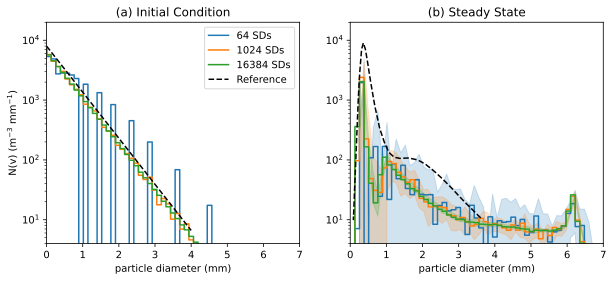

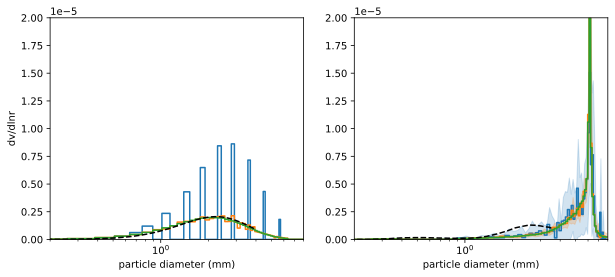

HTML(value="<a href='./fig6_straub_fig10.pdf' target='_blank'>./fig6_straub_fig10.pdf</a><br>")

HTML(value="<a href='./straub_dvdlnr.pdf' target='_blank'>./straub_dvdlnr.pdf</a><br>")

In [3]:
run_sims = True
n_sds = [2**6, 2**10, 2**14] if 'CI' not in os.environ else [32]
steps = [0, 7200] 
nruns = 10 if 'CI' not in os.environ else 1

(fig, ax) = pyplot.subplots(nrows=1, ncols=2, figsize=(10,4))
(fig2, ax2) = pyplot.subplots(nrows=1, ncols=2, figsize=(10,4))      

# Obtain data
parameterization = 'Straub2010'
for n_sd in n_sds:
    if run_sims:
        t1 = time.time()
        run_to_steady_state(parameterization, n_sd, steps, nruns, dt=1*si.s)
        t2 = time.time()
        print('ran '+parameterization+' for '+str(n_sd)+' superdroplets in '+str(t2 - t1)+' sec')
    data_filename = 'steadystate_' + parameterization + '_' + str(n_sd) + 'sd.pkl'
    with open(data_filename, 'rb') as handle:
        (x, y_ensemble, y2_ensemble, rates) = pkl.load(handle)
    
    # statistics
    # mass density
    y_mean = np.nanmean(y_ensemble, axis=0)
    y_std = np.nanstd(y_ensemble, axis=0)

    # number density
    y2_mean = np.nanmean(y2_ensemble, axis=0)
    y2_std = np.nanstd(y2_ensemble, axis=0)

    # Plotting
    cmap = matplotlib.cm.get_cmap('viridis')
    dr = np.diff(x) * si.um
    dr = np.concatenate([dr, [dr[-1]]])

    legend_entries = []

    color = next(ax[0]._get_lines.prop_cycler)['color'] # pylint: disable=protected-access
    for (j, step) in enumerate(steps):  # pylint: disable=protected-access
        if step != 0:
            lbl = str(n_sd) + ' SDs'
            ax[1].step(2*x*si.mm, y2_mean[j]/2/dr * si.mm,linestyle='-',color=color,
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            ax[1].fill_between(2*x*si.mm, y2_mean[j]/2/dr * si.mm - y2_std[j]/2/dr * si.mm, 
                               y2_mean[j]/2/dr * si.mm + y2_std[j]/2/dr * si.mm, color=color, alpha=0.2)
            
            ax2[1].step(2*x*si.mm, y_mean[j],linestyle='-',color=color,
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            ax2[1].fill_between(2*x*si.mm, y_mean[j] - y_std[j], 
                    y_mean[j] + y_std[j], color=color, alpha=0.2)
        else:
            lbl = str(n_sd) + ' SDs'
            ax[0].step(2*x*si.mm, y2_mean[j]/2/dr * si.mm,linestyle='-',color=color,
                    label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

            ax2[0].step(2*x*si.mm, y_mean[j],linestyle='-',color=color,
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            
# Reference data
ax[0].plot(straub_x_init/si.mm, straub_y_init, color='k', linestyle='--', label='Reference')
ax[1].plot(straub_x/si.mm, np.power(10, straub_log_y) ,color='k',linestyle='--', label='Reference')

ax2[0].plot(straub_x_init/si.mm, straub_dvdlnr_init, color='k', linestyle='--', label='Reference')
ax2[1].plot(straub_x/si.mm, straub_dvdlnr_ss / si.mm ,color='k',linestyle='--', label='Reference')

ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xlim([0.0, 7.0])
ax[1].set_xlim([0.0, 7.0])
ax[0].set_ylim([4.0, 2e4])
ax[1].set_ylim([4.0, 2e4])

ax2[0].set_xscale("log")
ax2[1].set_xscale("log")
ax2[0].set_xlim([0.2, 8.0])
ax2[1].set_xlim([0.2, 8.0])
ax2[0].set_ylim([0.0, 2e-5])
ax2[1].set_ylim([0.0, 2e-5])
ax[0].set_xlabel("particle diameter (mm)")
ax[1].set_xlabel("particle diameter (mm)")
ax2[0].set_xlabel("particle diameter (mm)")
ax2[1].set_xlabel("particle diameter (mm)")

ax[0].set_ylabel("N(v) (m$^{-3}$ mm$^{-1})$")
ax2[0].set_ylabel("dv/dlnr")

ax[0].legend()
ax[0].set_title("(a) Initial Condition")
ax[1].set_title("(b) Steady State")
show_plot('fig9_straub_fig10.pdf', fig=fig)
show_plot('straub_dvdlnr.pdf', fig=fig2)